In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [1]:
df_policy_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/policy_0702.csv')
df_claim_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/claim_0702.csv')
df_training_raw = pd.read_csv('../Tbrain_Insurance/training-set.csv')
df_testing_raw = pd.read_csv('../Tbrain_Insurance/testing-set.csv')
df_policy = df_policy_raw 
df_claim = df_claim_raw 
df_training = df_training_raw
df_testing = df_testing_raw
pd.set_option('display.max_columns', None)

In [6]:
# Policy_Number	保單號碼 
# Insured's_ID	被保險人代號(替代值) 
# Prior_Policy_Number	前保單號     almost == Cancellation =='Y'
# Cancellation	非繼承自前保單        almost match "Prior_policy Number, only #12 w/o cancellation
# Vehicle_identifier	車牌號碼 
# Vehicle_Make_and_Model1	廠牌名稱一 
# Vehicle_Make_and_Model2	廠牌名稱二
# Manafactured_Year_and_Month	製造年份 
# Engine_Displacement_(Cubic_Centimeter)	排氣量 
# Imported_or_Domestic_Car	車系代號
# Coding_of_Vehicle_Branding_&_Type	廠牌車型代號
# qpt	乘載數量 
# fpt	乘載單位 
# Main_Insurance_Coverage_Group	險種分類 
# Insurance_Coverage	險種代碼
# Insured_Amount1	保額一 
# Insured_Amount2	保額二 
# Insured_Amount3	保額三
# Coverage_Deductible_if_applied	自負額 
# Premium	簽單保費 
# Replacement_cost_of_insured_vehicle	重置成本
# Distribution_Channel	主通路代號 
# Multiple_Products_with_TmNewa_(Yes_or_No?)	同一車主前一年度非車險保單件數
# lia_class	車責本期級數 
# plia_acc	車責賠款係數 
# pdmg_acc	車體賠款係數 
# fassured	被保險人性質
# ibirth	出生日期 
# fsex	性別 
# fmarriage	婚姻狀況 
# aassured_zip	郵遞區號
# iply_area	承保地區代號(分公司) 
# dbirth	要保人出生日期 
# fequipment1	配備-音響註記 
# fequipment2	配備-車箱註記 
# fequipment3	配備-冷凍機組註記 
# fequipment4	配備-車框、車斗註記 
# fequipment5	配備-昇降系統註記 
# fequipment6	配備-電動車電池註記
# fequipment9	配備-其他 
# nequipment9	配備-其他說明

In [8]:
# Policy File
df_policy.shape # total count  (1747942, 41)
df_policy['Policy_Number'].nunique() # 351273 unique value

351273

In [17]:
# Prior_Policy_Number
# is null: not null =  328557 : 1419385
df_policy[df_policy['Prior_Policy_Number'].isnull()]

,Policy_Number,Insured's_ID,Prior_Policy_Number,Cancellation,Vehicle_identifier,Vehicle_Make_and_Model1,Vehicle_Make_and_Model2,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,Coding_of_Vehicle_Branding_&_Type,qpt,fpt,Main_Insurance_Coverage_Group,Insurance_Coverage,Insured_Amount1,Insured_Amount2,Insured_Amount3,Coverage_Deductible_if_applied,Premium,Replacement_cost_of_insured_vehicle,Distribution_Channel,Multiple_Products_with_TmNewa_(Yes_or_No?),lia_class,plia_acc,pdmg_acc,fassured,ibirth,fsex,fmarriage,aassured_zip,iply_area,dbirth,fequipment1,fequipment2,fequipment3,fequipment4,fequipment5,fequipment6,fequipment9,nequipment9
58,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,竊盜,05N,0,0,48000,10,90,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
59,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16G,3000000,0,6000000,0,1280,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
60,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16P,0,0,500000,0,973,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
61,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,29B,0,3000000,12000000,0,887,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
62,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,29K,0,0,3000000,0,475,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
63,5431130fb4fad06388f345f6e1d3e71ec1089d32,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,a27682ea8c6a0052885a96e8301d618c53912c75,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2003,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,竊盜,05N,0,0,41000,10,77,50.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
64,5431130fb4fad06388f345f6e1d3e71ec1089d32,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,a27682ea8c6a0052885a96e8301d618c53912c75,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2003,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16G,3000000,0,6000000,0,1280,50.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0

<Container object of 10 artists>

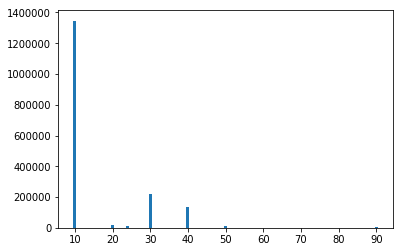

In [69]:
# Imported_or_Domestic_Car : 車系代號
# 10	國產車 77%
# 20	美國車  1%
# 21	福特
# 22	通用
# 23	克萊斯勒
# 24	美規日車 1%
# 30	歐洲車 12.5%
# 40	日本車 7.7%
# 50	韓國車
# 90	其它

# counts
# df_car.groupby('Imported_or_Domestic_Car').count()
# 10    1346381
# 20      15375
# 21        858
# 22        207
# 23         29
# 24      14459
# 30     218102
# 40     134929
# 50      12249
# 90       5353

car_types = sorted(df_policy['Imported_or_Domestic_Car'].unique()) # [10, 20, 21, 22, 23, 24, 30, 40, 50, 90]

# for b in sorted(set(df_policy['Imported_or_Domestic_Car'])):
#     print(b, "  ", df_policy[df_policy['Imported_or_Domestic_Car'] == b].shape[0] / df_policy.shape[0] * 100, "%")
plt.bar(car_types, df_car['Imported_or_Domestic_Car'].value_counts().sort_index().values)

<Container object of 6 artists>

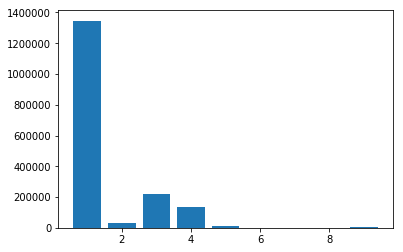

In [84]:
#  Imported_or_Domestic_Car 十位數
df_car = df_policy[['Imported_or_Domestic_Car']].copy()
df_car['car_types'] = (df_car['Imported_or_Domestic_Car'] /10).apply(np.floor)
df_car['car_types'].value_counts().sort_index().values
plt.bar(sorted(df_car['car_types'].unique()), df_car['car_types'].value_counts().sort_index())